# <center> ЛБ Импульсные методы ЯМР

In [47]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from math import trunc
import pandas as pd
%matplotlib inline

In [2]:
c_label = [0.0125, 0.025, 0.05, 0.1, 0.25, 0.5]

In [3]:
# [t,u]->[ms, v]

t1_dict={
    'глицерин':[[90,80,70,60,50,40, 30, 20, 10],[5.8,5.4, 5.2, 5., 4.6, 4., 3.4, 2.6, 1.6]],
    '0.0125':[[90,80,70,60,50,40,30,20,10],[5.4, 5., 4.8, 4.4, 4., 3.4, 2.8, 2.2, 1.6]],
    '0.025':[[90,80,70,60,50,40,30,20,10],[5.8, 5.6, 5.2, 4.8, 4.4, 3.8, 3.2, 2.6,1.8]],
    '0.05':[[90,80,70,60,50,40,30,20,10],[6.6, 6.4, 6.2, 6., 5.8, 5.2, 4.6, 3.6, 2.2]],
    '0.1':[[70,60, 50,40,30,20,10],[5.4, 5.2, 5., 4.6, 4.2, 3.4, 2.]],
    '0.25':[[90,30,20,10],[5.2, 5., 4.8, 3.6]],
    '0.5':[[30, 20,10], [4.3, 4.2, 3.6]],
    'x':[[50, 40, 30, 20, 10], [5.5, 5.3, 4.9, 4.1, 2.6]],
    'water':[[9*10**3, 6*10**3, 4*10**3, 3*10**3, 2*10**3, 1*10**3],[8., 7., 6., 5., 4., 2.2]],
    'c2h5oh':[[9*10**3, 5*10**3, 4*10**3, 3*10**3, 2*10**3, 1*10**3],[5.4, 5., 4.8, 4.4, 3.6, 2.]]
}

t2_dict={
    'глицерин':[[1,2,3,4,5,6,7,8,9,10,20],[5.8, 5.2, 4.8, 4.4, 4., 3.6, 3.2, 3., 2.8, 2.4, 0.4]],
    '0.0125':[[1,2,3,4,5,6,7,8,9,10,20],[5.4, 5., 4.8, 4.4, 4.2, 4., 3.8, 3.6, 3.4, 3.2, 0.7]],
    '0.025':[[1,2,3,4,5,6,7,8,9,10,20],[5.8, 5.6, 5.2, 5., 4.6, 4.4, 4., 3.8, 3.6, 3.2, 1.4]],
    '0.05':[[1,2,3,4,5,6,7,8,9,10,20],[6.6, 6., 5.4, 5., 4.4, 4., 3.6, 3.2, 3., 2.6, 0.8]], 
    '0.1':[[1,2,3,4,5,6,7,9,10],[5.4, 4.6, 4.2, 3.6, 3.2, 2.8, 2.6, 2.2, 1.6]],
    '0.25':[[1,2,3,4,5,6,7,8,9],[5.2, 4., 2.8, 2., 1.6, 1., 0.8, 0.6, 0.2]],
    '0.5':[[1,2,3,4,5],[4.2, 2.8, 1.4, 0.8, 0.4]],
    'x':[[1,2,3,4,5,6,7,8,9,10],[5.5, 4.5, 3.7, 4.3, 2.5, 2., 1.7, 1.4, 1.1, 0.9]],
    'water':[[1,20,40, 50],[8., 7.4, 3., 1.4]],
    'c2h5oh':[[1,5,10,20],[5.4, 5., 4.2, 1.2]]
}

In [4]:
def test_dict(t_dict):
    for l in t_dict:
        if len(t_dict[l][0])==len(t_dict[l][1]):
            print(l+':'+'good')
        else:
            print(l+':'+'bad')

In [5]:
def log_scale_t1(t_dict, coef=1):
    log_dict={}
    for l in t_dict:
        t_dict[l][0].pop(0)
        log_line_t = np.array(t_dict[l][0])*coef
        log_line_u = []
        a0 = t_dict[l][1].pop(0)
        for u in t_dict[l][1]:
            log_line_u.append(np.log(a0-u+0.00001)-np.log(a0))
        log_dict[l] = np.array([log_line_t, log_line_u])
    return log_dict

def log_scale_t2(t_dict, coef=2):
    log_dict={}
    for l in t_dict:
        log_line_t = np.array(t_dict[l][0])*coef
        a0 = t_dict[l].pop(0)
        log_line_u = np.log(a0/np.asarray(t_dict[l]))
        log_dict[l] = np.array([log_line_t, log_line_u])
    return log_dict

In [6]:
test_dict(t1_dict)
test_dict(t2_dict)

0.25:good
0.1:good
0.5:good
x:good
0.025:good
0.05:good
water:good
c2h5oh:good
глицерин:good
0.0125:good
0.25:good
0.1:good
0.5:good
x:good
0.025:good
0.05:good
water:good
c2h5oh:good
глицерин:good
0.0125:good


In [7]:
log_t1_dict = log_scale_t1(t1_dict)
log_t2_dict = log_scale_t2(t2_dict, coef=2.)

In [8]:
def lin(i, slope, intercept):
    return slope*i+intercept

In [39]:
def graphic(x, y, x_label='x', y_label = 'y', title='title', ax = None):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.scatter(x,y, label = 'reg points')
    lin_x = [min(x), max(x)]
    lin_y = []
    for i in lin_x:
        lin_y.append(lin(i, slope, intercept))
    ax.plot(lin_x, lin_y, label = 'reg line')
    ax.set_title(str(title))
    ax.set_xlabel(str(x_label))
    ax.set_ylabel(str(y_label))
    return ax, slope, intercept

### <center> Нахождение периодов релаксации (T1, T2)

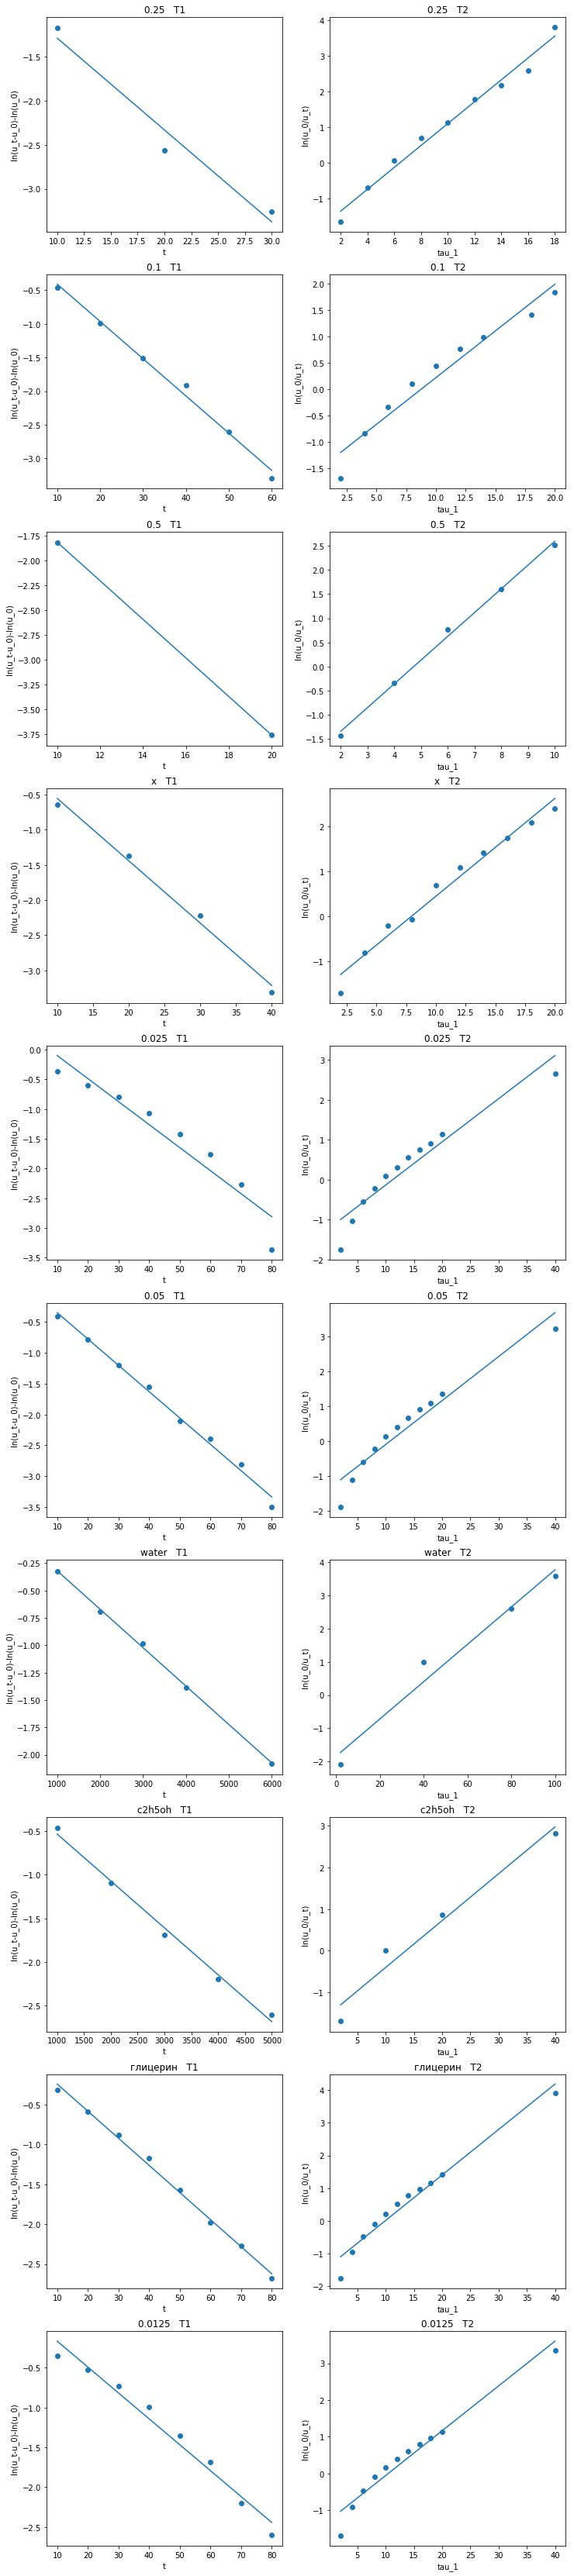

In [43]:
fig =  plt.figure(1,figsize=(12,60))
dict_T = {}
for i, l in enumerate(log_t1_dict):
    ax1 = fig.add_subplot(len(log_t1_dict), 2,2*i+1)
    x1 = log_t1_dict[l][0]
    y1 = log_t1_dict[l][1]
    ax1, s, inter = graphic(x1, 
                            y1, 
                            x_label = 't', 
                            y_label='ln(u_t-u_0)-ln(u_0)', 
                            title=l + '   T1', 
                            ax = ax1
            );
    T1 = -1/s
    ax2 = fig.add_subplot(len(log_t1_dict), 2,2*i+2)
    x2 = log_t2_dict[l][0]
    y2 = log_t2_dict[l][1]
    ax2, s, inter = graphic(x2, 
                            y2, 
                            x_label = 'tau_1', 
                            y_label='ln(u_0/u_t)',
                            title=l + '   T2', 
                            ax = ax2
            );
    T2 = 1/s
    dict_T[l] = [T1, T2]

In [16]:
df_T = pd.DataFrame(dict_T, index = ['T1', 'T2'])

Времена релаксаций.

In [29]:
df_T = df_T.round(1)
df_T = df_T.T
df_T

,T1,T2
0.0125,30.7,8.2
0.025,25.8,9.2
0.05,23.4,7.9
0.1,18.0,5.6
0.25,9.6,3.2
0.5,5.1,2.0
c2h5oh,1859.2,8.9
water,2848.3,17.8
x,11.3,4.6
глицерин,29.4,7.2


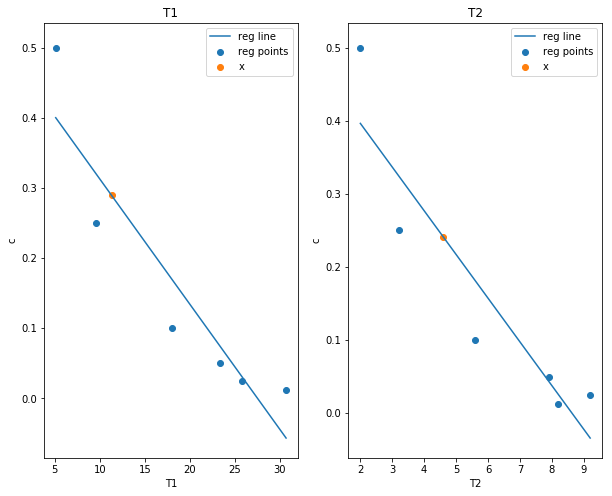

In [41]:
fig = plt.figure(1, figsize = (10,8))
con = []
for i, l in enumerate(df_T):
    ax = fig.add_subplot(1, 2,i+1)
    x = df_T.loc[:'0.5', l].values
    y = c_label
    ax, s, inter = graphic(x,
                           y, 
                           x_label = l, 
                           y_label='c', 
                           title=l, 
                           ax = ax
            );
    x = df_T.loc['x', l]
    y = lin(x, s, inter)
    con.append(y)
    ax.scatter(x, y, label = 'x')
    ax.legend()

### <center> Концентрация неизвестного раствора

In [54]:
c = np.mean(con) 
print('Концентрация раствора: '+'%.2f'%c)

Концентрация раствора: 0.27
